# Import libs

In [1]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union


Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu



# 1. Structural properties of the Facebook network

**QUESTION 1:** A first look at the network:

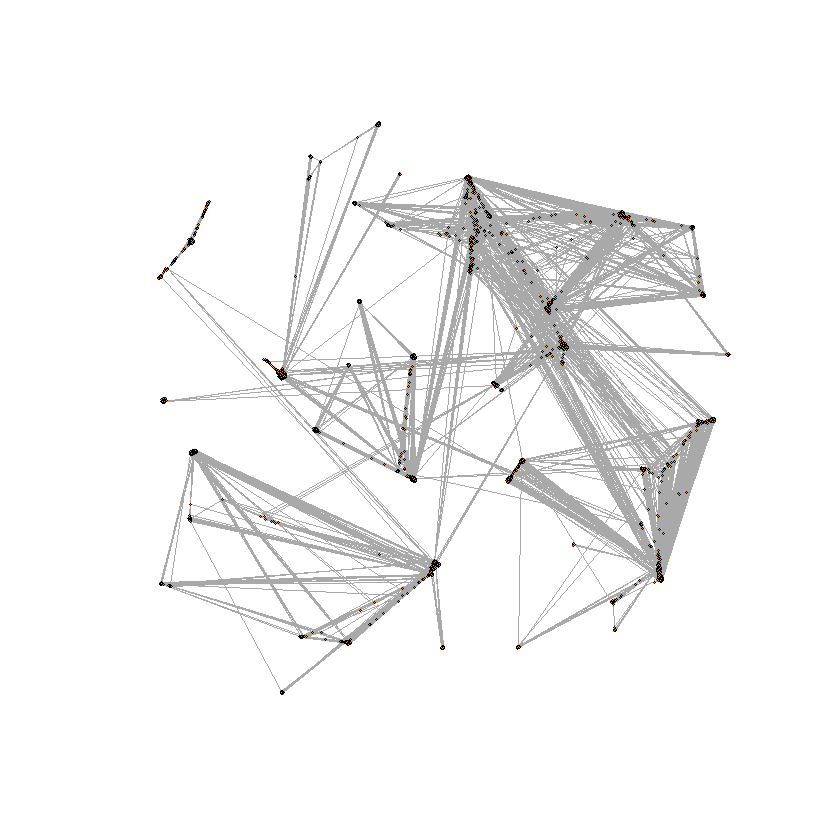

In [2]:
facebook <- read_graph("data/facebook_combined.txt", directed=FALSE)

# make plot
plot(facebook, vertex.size=1, vertex.label=NA)

# # save plot
# png(file="plots/q1.png", width=600, height=450)
# plot(facebook, vertex.size=1, vertex.label=NA)
# dev.off()

**QUESTION 1.1:** Report the number of nodes and number of edges of the Facebook network.

In [4]:
print("number of vertices")
gorder(facebook)
print("number of edges")
gsize(facebook)

[1] "number of vertices"


[1] 4039

[1] "number of edges"


[1] 88234

**QUESTION 1.2:** Is the Facebook network connected? If not, find the giant connected component (GCC) of the network and report the size of the GCC.

In [3]:
is.connected(facebook)

[1] TRUE

As facebook graph is connected, GCC size is 4039

**QUESTION 2:** Find the diameter of the network. If the network is not connected, then find the diameter of the GCC.

In [6]:
diameter(facebook)

[1] 8

**QUESTION 3:** Plot the degree distribution of the facebook network and report the average degree.

In [7]:
generate_mask <- function(vector_w_zeros) {
    # function that generates mask, which removes zero values from the vector
    
    # find which indices we need to remove
    to_remove <- which(vector_w_zeros == 0)
    # initialize mask
    mask <- c(ones(1, length(vector_w_zeros)))
    # mark elements we need to remove in the mask
    for (i in 1:length(vector_w_zeros)) {
        if (is.element(i, to_remove)) {
            mask[i] <- 0
        }
    }
    # convert mask to boolean
    mask <- mask > 0.5
    
    return(mask)
}

png 
  2

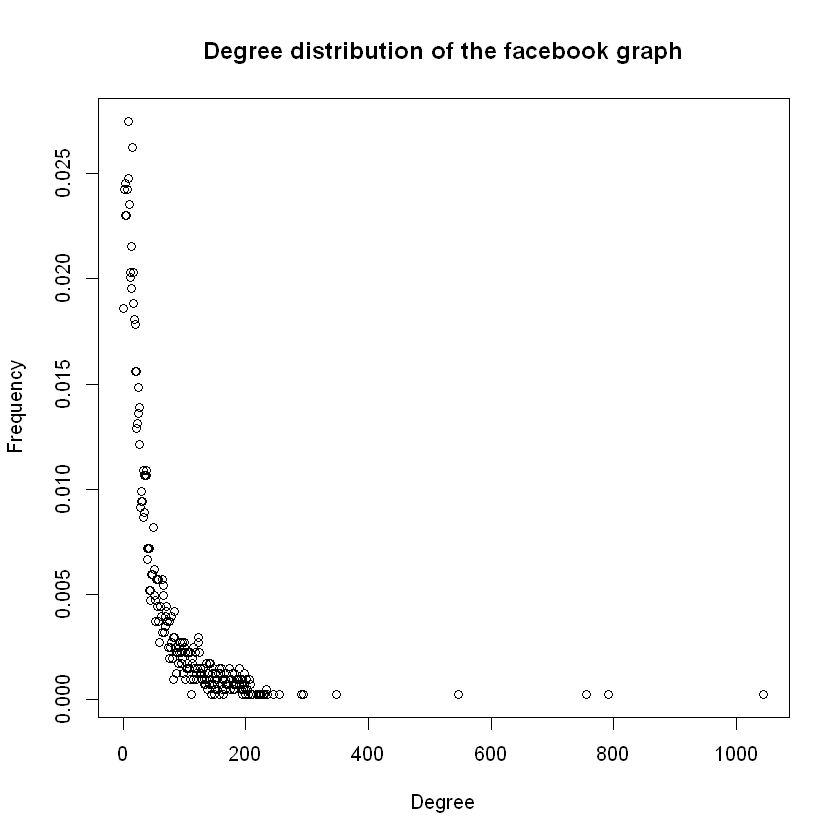

In [8]:
# get x axis
degrees <- seq_along(degree.distribution(facebook)) - 1
# get y axis
distribution <- degree.distribution(facebook)
# get a mask to filter out zeros
mask <- generate_mask(distribution)

# plot for reference
plot(degrees[mask], distribution[mask],
     main="Degree distribution of the facebook graph",
     xlab="Degree",
     ylab="Frequency",)

# save plot
png(file="plots/q3.png", width=600, height=450)

plot(degrees[mask], distribution[mask],
     main="Degree distribution of the facebook graph",
     xlab="Degree",
     ylab="Frequency",)

dev.off()

In [9]:
# init average
average = 0
# for all nodes
for (i in 1:gorder(facebook)) {
    # add node's degree to average
    average <- average + degree(facebook, v=i)
}
# divide total by the number of nodes
average <- average / gorder(facebook)
print("Average degree")
print(average)

[1] "Average degree"
[1] 43.69101


**QUESTION 4:** Plot the degree distribution of Question 3 in a log-log scale. Try to fit a line to the plot and estimate the slope of the line.

In [10]:
# get degrees present in a net along with frequencies with which they appear
degrees <- seq_along(degree.distribution(facebook)) - 1
distribution <- degree.distribution(facebook)
# convert them to collections and then to matrices
X <- matrix(c(degrees), byrow=TRUE, nrow=1)
Y <- matrix(c(distribution), byrow=TRUE, nrow=1)
# delete entries with zero frequencies from both matrices
# this allows to avoid - infinity values after log scaling and makes sense
# as these data is not actually present in the net
indices = which(Y!=0,arr.ind = T)
X <- X[indices]
Y <- Y[indices]
# log scale data
X <- log(X)
Y <- log(Y)
# select how many elements you want to delete from the end to avoid outliners
delete <- 0
# calculate len of the desired array
len <- size(X)[2] - delete
# get the slices of both matrices
X <- X[0:len]
Y <- Y[0:len]

In [11]:
# train linear regression model on the data
model = lm(Y ~ X)

png 
  2

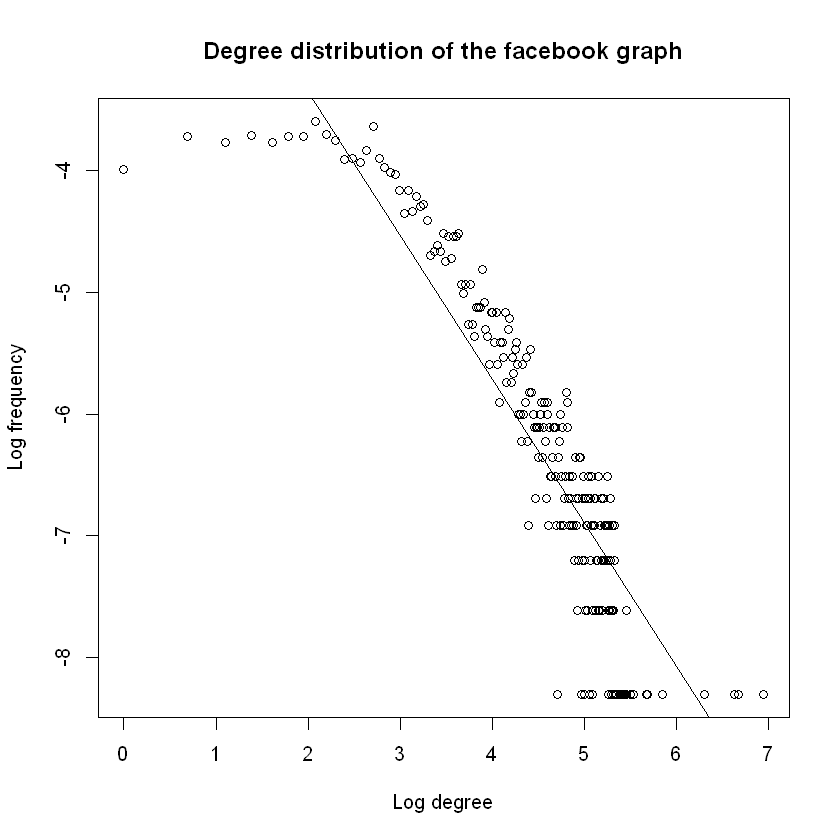

In [12]:
# plot for reference
plot(X, Y,
     main="Degree distribution of the facebook graph",
     xlab="Log degree",
     ylab="Log frequency",)
abline(model)

# save plot
png(file="plots/q4.png", width=600, height=450)

plot(X, Y,
     main="Degree distribution of the facebook graph",
     xlab="Log degree",
     ylab="Log frequency",)
abline(model)

dev.off()

In [13]:
# print model summary
# coefficient we are looking for is X estimate. 
summary(model)


Call:
lm(formula = Y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9940 -0.3032  0.1697  0.4064  0.8927 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.99222    0.17522  -5.663 4.52e-08 ***
X           -1.18016    0.03821 -30.889  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5772 on 225 degrees of freedom
Multiple R-squared:  0.8092,	Adjusted R-squared:  0.8083 
F-statistic: 954.1 on 1 and 225 DF,  p-value: < 2.2e-16


We can see that facebook network distribution resembles power law distribution with $k \approx 1$

**QUESTION 5:** Create a personalized network of the user whose ID is 1. How many nodes and edges does this personalized network have?

png 
  2

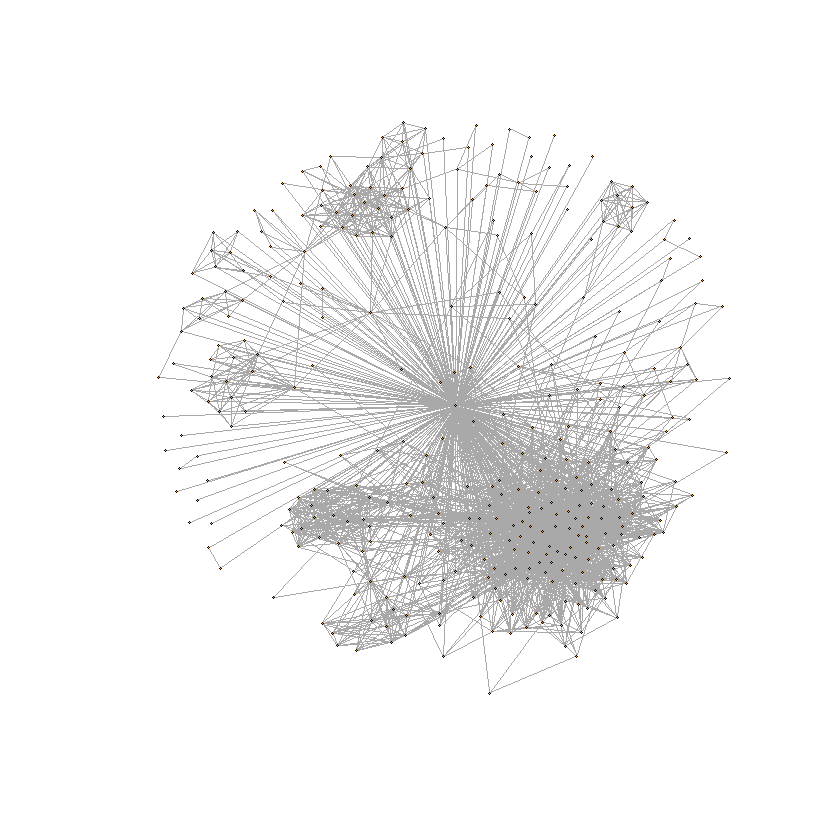

In [14]:
id1 <- make_ego_graph(facebook, order = 1, nodes=1)[[1]]

# plot the personalized net
plot(id1, vertex.size=1, vertex.label=NA)

# save plot
png(file="plots/q5.png", width=600, height=450)
plot(id1, vertex.size=1, vertex.label=NA)
dev.off()

In [15]:
print("number of vertices")
gorder(id1)
print("number of edges")
gsize(id1)

[1] "number of vertices"


[1] 348

[1] "number of edges"


[1] 2866

**QUESTION 6:** What is the diameter of the personalized network? Please state a trivial upper and lower bound for the diameter of the personalized network.

In [55]:
diameter(id1)

[1] 2

trivial - 0, if there is no vertices connected to the central vertex. Maximal - 2, as all vertices are connected to the center one.

**QUESTION 7:** In the context of the personalized network, what is the meaning of the diameter of the personalized network to be equal to the upper bound you derived in Question 6. What is the meaning of the diameter of the personalized network to be equal to the lower bound you derived in Question 6 (assuming there are more than 3 nodes in the personalized network)?

Assuming how question is asked, lower bound for net with > 3 nodes is 1, higher is 2. If diameter == lower bound, then the net is fully connected meaning each node is connected with each. If diameter == higher, then it is not.

**QUESTION 8:** How many core nodes are there in the Facebook network. What is the average
degree of the core nodes?

In [ ]:
# Save degree array of Facegbook graph in "sizes"
sizes = degree(facebook)
# For which of these indices is the degree > 200? 
coreInd = which(sizes > 200)
print(length(coreInd))
# Take the average degree for these indices 
avCoreDeg = mean(degree(facebook, v=V(facebook)[coreInd]))
print(avCoreDeg)

**QUESTION 9:** Node ID 1, Node ID 108, Node ID 349, Node ID 484, Node ID 1087. For each of the above core node’s personalized network, find the community structure using Fast-Greedy, Edge-Betweenness, and Infomap community detection algorithms. Compare
the modularity scores of the algorithms. For visualization purpose, display the community structure
of the core node’s personalized networks using colors. Nodes belonging to the same community
should have the same color and nodes belonging to different communities should have different
color. In this question, you should have 15 plots in total.

In [ ]:
node_ids = c(1, 108, 349, 484, 1087) 
# List of personalized networks matching the specified node ids 
personalized_networks = make_ego_graph(facebook, 1, nodes=V(facebook)[node_ids]) 
# For each core node's personalized network, find the community structure using
# Fast-Greedy, Edge-Betweenness, Infomap 
for (n in 1:5){
    # Find community structure using Fast-Greedy:
    cfg = cluster_fast_greedy(personalized_networks[[n]]) 
    cat("Fast-Greedy Modularity Score: ", modularity(cfg), "\n") 
    # Plot community structure 
    cfg_node_color <- cfg$membership -1
    plot(personalized_networks[[n]], mark.groups=groups(cfg), edge.arrow.size=.4, 
         vertex.color=cfg_node_color, vertex.size=3,vertex.label="",
    main=paste("Fast-Greedy, core node ",node_ids[n],collapse=""))
    
    # Find community structure using Edge-Betweenness:
    ceb = cluster_edge_betweenness(personalized_networks[[n]]) 
    cat("Edge-Betweenness Modularity Score: ", modularity(ceb), "\n") 
    # Plot community structure 
    ceb_node_color <- ceb$membership -1
    plot(personalized_networks[[n]], mark.groups=groups(ceb), edge.arrow.size=.4, 
         vertex.color=ceb_node_color, vertex.size=3,vertex.label="", 
    main=paste("Edge-Betweenness, core node ",node_ids[n],collapse=""))
    
    # Find community structure using Infomap:
    cim = cluster_infomap(personalized_networks[[n]]) 
    cat("Infomap Modularity Score: ", modularity(cim), "\n") 
    # Plot community structure 
    cim_node_color <- cim$membership -1
    plot(personalized_networks[[n]], mark.groups=groups(cim), edge.arrow.size=.4, 
         vertex.color=cim_node_color, vertex.size=3,vertex.label="",
    main=paste("Infomap, core node ",node_ids[n],collapse=""))
    
    
}

**QUESTION 10:** For each of the core node’s personalized network (use same core nodes as
Question 9), remove the core node from the personalized network and find the community structure
of the modified personalized network. Use the same community detection algorithm as Question 9.
Compare the modularity score of the community structure of the modified personalized network with
the modularity score of the community structure of the personalized network of Question 9. For
visualization purpose, display the community structure of the modified personalized network using
colors. In this question, you should have 15 plots in total.

In [ ]:
for (n in 1:5){
    # get the degree distribution of the net
    deg <- degree(some_graph)
    # find core node
    core <- which.max(deg)
    # Delete the core node 
    curr_network <- delete_vertices(personalized_networks[[n]], core)
    # Find community structure using Fast-Greedy:
    cfg = cluster_fast_greedy(curr_network) 
    cat("Fast-Greedy Modularity Score: ", modularity(cfg), "\n") 
    # Plot community structure 
    cfg_node_color <- cfg$membership -1
    plot(curr_network, mark.groups=groups(cfg), edge.arrow.size=.4, 
         vertex.color=cfg_node_color, vertex.size=3,vertex.label="",
    main=paste("Fast-Greedy, core node ",node_ids[n],collapse=""))
    
    # Find community structure using Edge-Betweenness:
    ceb = cluster_edge_betweenness(curr_network) 
    cat("Edge-Betweenness Modularity Score: ", modularity(ceb), "\n") 
    # Plot community structure 
    ceb_node_color <- ceb$membership -1
    plot(curr_network, mark.groups=groups(ceb), edge.arrow.size=.4, 
         vertex.color=ceb_node_color, vertex.size=3,vertex.label="", 
    main=paste("Edge-Betweenness, core node ",node_ids[n],collapse=""))
    
    # Find community structure using Infomap:
    cim = cluster_infomap(curr_network) 
    cat("Infomap Modularity Score: ", modularity(cim), "\n") 
    # Plot community structure 
    cim_node_color <- cim$membership -1
    plot(curr_network, mark.groups=groups(cim), edge.arrow.size=.4, 
         vertex.color=cim_node_color, vertex.size=3,vertex.label="",
    main=paste("Infomap, core node ",node_ids[n],collapse=""))
    
    
}

**QUESTION 11:** Write an expression relating the Embeddedness between the core node and
a non-core node to the degree of the non-core node in the personalized network of the core node.

See overleaf

**QUESTION 12:** For each of the core node’s personalized network (use same core nodes as
Question 9), remove the core node from the personalized network and find the community structure
of the modified personalized network. Use the same community detection algorithm as Question 9.
Compare the modularity score of the community structure of the modified personalized network with
the modularity score of the community structure of the personalized network of Question 9. For
visualization purpose, display the community structure of the modified personalized network using
colors. In this question, you should have 15 plots in total.

In [4]:
get_embeddedness <- function(some_graph) {
    # function that finds embdeddedness for each node except the core node (as it is not defined for the core)
    
    # get the degree distribution of the net
    deg <- degree(some_graph)
    # account for the core node
    embs <- deg - 1
    # find core node
    core <- which.max(deg)
    # embeddedness for the core node is not defined
    embs <- embs[-core]
    return(embs)
}

In [77]:
get_dispersion <- function(some_graph) {
    # function that finds dispersion for each node except the core node (as it is not defined for the core)
    
    # declare dispersion
    dispersion <- c(rep(0, length(V(some_graph))))
    # as we will be working with subgraphs, we will need a stable attributesthat will not change after
    # inducing subgraphs with removed vertices; thus, we make a "custom_id"; remember that this operation
    # does not yet change real id of nodes
    # signature: set_vertex_attr(graph, name, index = V(graph), value)
    marked_graph <- set_vertex_attr(some_graph, "custom_id", value=1:length(V(some_graph)))
    # get degree distribution
    deg <- degree(marked_graph)
    # find true id of core node in the graph
    core <- which.max(deg)
    # for each node 
    for (i in 1:length(V(marked_graph))) {    
        # except the core
        if (i != core) {
            # find the neighbours of the node
            nbs <- neighbors(marked_graph, v=i)
            # delete the core from the neighbours
            nbs <- nbs[-which(nbs==core)]
            # get csutom id-s of neighbors
            nbs_custom_id <- vertex_attr(marked_graph, "custom_id", index = nbs)            
            # get modified graph of personalized graph (article, page 3 on the right)
            subnet <- delete_vertices(marked_graph, c(i, core))
            # get list of custom id-s of new subgraph
            subnet_custom_id <- vertex_attr(subnet, "custom_id")            
            # get true id-s of neighbors in the subgraph
            nbs_subgraph <- which(subnet_custom_id %in% nbs_custom_id)
            # get distances for the neighbours
            dist <- distances(subnet, v = nbs_subgraph, to = nbs_subgraph)
            # calculate dispersion based on custom distance function
            dispersion[i] <- sum((dist >= 3) * 1) / 2
        }
    }
    # dispersion for the core node is not defined
    dispersion <- dispersion[-core]
    return(dispersion)
}

In [ ]:
node_ids = c(1, 108, 349, 484, 1087) 
# List of personalized networks matching the specified node ids 
personalized_networks = make_ego_graph(facebook, 1, nodes=V(facebook)[node_ids], mindist = 0) 
# For each core node's personalized network, find the community structure using
# Fast-Greedy, Edge-Betweenness, Infomap 
pair = matrix(data = 0, nrow = 2, ncol = 1)
for (n in 1:5){
    #plot(personalized_networks[[n]], vertex.size=1, vertex.label=NA)
    # Find community structure using Fast-Greedy:
    core_node = which.max(ego_size(personalized_networks[[n]], order = 1, nodes = V(personalized_networks[[n]])))
    core_node_deg = ego_size(personalized_networks[[n]], order = 1, nodes = core_node)
    embed = matrix(data = 0, nrow = core_node_deg, ncol = 1)
    disper = matrix(data = 0, nrow = core_node_deg, ncol = 1)
    core_neighbors = neighbors(personalized_networks[[n]],core_node)
    pair[1] = core_node
    #print(n)
    for (i in 1:(core_node_deg-2)){
        
        if(i != core_node){
            
            inter = intersection(core_neighbors, neighbors(personalized_networks[[n]],i))
            #print(i)
            embed[i] = length(intersection(core_neighbors, neighbors(personalized_networks[[n]],i)))

           
        
        
        
        }    
        #print(inter)
    }
    embed[core_node] = 0
    hist(embed, breaks = 20, main = " ")
    title(main = paste("Embeddedness Histogram for node ", node_ids[n], sep = ""), font.main = 2)

}

In [ ]:
node_ids = c(1, 108, 349, 484, 1087) 
# List of personalized networks matching the specified node ids 
personalized_networks = make_ego_graph(facebook, 1, nodes=V(facebook)[node_ids], mindist = 0) 
# For each core node's personalized network, find the community structure using
# Fast-Greedy, Edge-Betweenness, Infomap 
pair = matrix(data = 0, nrow = 2, ncol = 1)
max_disp = matrix(data = 0, nrow = 5, ncol = 1)
max_emb = matrix(data = 0, nrow = 5, ncol = 1)
max_both = matrix(data = 0, nrow = 5, ncol = 1)
for (n in 1:5){
    
    #plot(personalized_networks[[n]], vertex.size=1, vertex.label=NA)
    # Find community structure using Fast-Greedy:
    core_node = which.max(ego_size(personalized_networks[[n]], order = 1, nodes = V(personalized_networks[[n]])))
    core_node_deg = ego_size(personalized_networks[[n]], order = 1, nodes = core_node)
    embed = matrix(data = 0, nrow = core_node_deg, ncol = 1)
    disper = matrix(data = 0, nrow = core_node_deg, ncol = 1)
    core_neighbors = neighbors(personalized_networks[[n]],core_node)
    pair[1] = core_node
    #print(n)
    for (i in 1:(core_node_deg)){
        
        if(i != core_node){
            
            inter = intersection(core_neighbors, neighbors(personalized_networks[[n]],i))
            #print(i)
            embed[i] = length(intersection(core_neighbors, neighbors(personalized_networks[[n]],i)))
            #print(inter)
            pair[2] = i
            curr_vert = V(personalized_networks[[n]])
            remove_vert = setdiff(curr_vert,inter)
            curr_network <- delete_vertices(personalized_networks[[n]], remove_vert)
            
            new_vert = V(curr_network)            
            #print(distances(curr_network,i,V(curr_network)))
            #print(core_node_deg)
            dist = distances(curr_network, new_vert, new_vert)
            
            for (k in 1:length(dist)){
                if (dist[k] == Inf && length(dist) > 0){
                    dist[k] = 2      
                }
            }
            
            disper[i] = sum(dist)
            #print(i)

        }    
        #print(inter)
    }
    #print((disper))
    for (j in 1:length(disper)){
                if (is.na(disper[j])){
                    disper[j] = 0
                }  
            }
    
    print(length(disper))
    embed[core_node] = 0
    hist(embed, breaks = 20, main = " ")
    title(main = paste("Embeddedness Histogram for node ", node_ids[n], sep = ""), font.main = 2)
    
    max_disp[n] = which.max(disper)
    hist(disper[1:(core_node_deg)], breaks = 40, main = " ", )
    title(main = paste("Dispersion Histogram for node ", node_ids[n], sep = ""), font.main = 2)
    
    max_emb[n] = which.max(embed)
    both = disper/embed
    #print(both)
    max_both[n] = which.max(both)
}

**Question 13** For each of the core node's personalized network, plot the community structure
of the personalized network using colors and highlight the node with maximum dispersion. Also,
highlight the edges incident to this node. To detect the community structure, use Fast-Greedy
algorithm. In this question, you will have 5 plots.

In [ ]:
for (n in 1:5){
    # Find community structure using Fast-Greedy:
    g = personalized_networks[[n]]
    ind = matrix(data = 1, nrow = length(V(g)), ncol = 1)
    ind[max_disp[n]] = 2
    cfg = cluster_fast_greedy(g)  
    # Plot community structure 
    cfg_node_color <- cfg$membership -1
    V(g)$color <- ifelse(V(g) == max_disp[n], "red", cfg_node_color)
    #E(g)[incident_edges(g,max_disp[n])]$color <-  "red"
    #E(g)$color <- incident_edges(g,max_disp[n]),
    neigh = neighbors(g,max_disp[n])
    edges = matrix(data = max_disp[n], nrow = 2*length(neighbors(g,max_disp[n])))
    for (i in 1:length(neigh)){
        edges[2*i] = neigh[i]
    }
    #print(edges)
    ei <- get.edge.ids(g, edges)
    #print(ei)
    E(g)$color <- "grey"
    E(g)[ei]$color <- "red"
    E(g)$width <- 1
    E(g)[ei]$width <- 3
    
    #print(incident_edges(g,max_disp[n]) )
    V(g)[max_disp[n]]$color<-"red"
    plot(personalized_networks[[n]], mark.groups=groups(cfg), edge.color = E(g)$color, 
         vertex.color=V(g)$color, vertex.size=ind*3, vertex.label="", edge.width = E(g)$width,
    main=paste("Max dispersion marked in red, core node ",node_ids[n],collapse=""))
   
    

**Question 14** Repeat Question 13, but now highlight the node with maximum embeddedness
and the node with maximum dispersion
embeddedness (excluding the nodes having zero embeddedness if there
are any). Also, highlight the edges incident to these nodes. Report the id of those nodes.

In [ ]:
for (n in 1:5){
    # Find community structure using Fast-Greedy:
    g = personalized_networks[[n]]
    ind = matrix(data = 1, nrow = length(V(g)), ncol = 1)
    ind[max_emb[n]] = 2
    ind[max_both[n]] = 2
    cfg = cluster_fast_greedy(g)  
    # Plot community structure 
    cfg_node_color <- cfg$membership -1
    V(g)$color <- ifelse(V(g) == max_emb[n], "blue", cfg_node_color)
    V(g)[max_both[n]]$color<-"green"
    neigh = neighbors(g,max_both[n])
    edges = matrix(data = max_both[n], nrow = 2*length(neighbors(g,max_both[n])))
    for (i in 1:length(neigh)){
        edges[2*i] = neigh[i]
    }
    #print(edges)
    ei <- get.edge.ids(g, edges)
    
    neigh1 = neighbors(g,max_emb[n])
    edges1 = matrix(data = max_emb[n], nrow = 2*length(neighbors(g,max_emb[n])))
    for (i in 1:length(neigh1)){
        edges1[2*i] = neigh1[i]
    }
    #print(edges)
    ei1 <- get.edge.ids(g, edges1)
    
    #print(ei)
    
    E(g)$color <- "grey"
    
    E(g)[ei1]$color <- "blue"
    E(g)[ei]$color <- "green"
    E(g)$width <- 1
    E(g)[ei]$width <- 3
    E(g)[ei1]$width <- 3
    
    #print(incident_edges(g,max_disp[n]) )
    plot(g, mark.groups=groups(cfg), edge.color = E(g)$color, 
         vertex.color=V(g)$color, vertex.size=ind*3, vertex.label="", edge.width = E(g)$width, 
         main=paste("Max dispersion/embeddedness marked in green,\n Max embeddedness marked in blue core node ",node_ids[n],collapse=""))
}

**Question 15** answer on overleaf

Having defined the friend recommendation procedure, we can now apply it to the personalized
network of node ID 415. Before we apply the algorithm, we need to create the list of users who
we want to recommend new friends to. We create this list by picking all nodes with degree 24.
We will denote this list as Nr.

**QUESTION 16:** What is |Nr|, i.e. the length of the list Nr?

In [ ]:
# Make personalized network of node ID 415
p_net_415 <- make_ego_graph(facebook, order = 1, nodes=V(facebook)[415])[[1]]
# Make a list of all nodes with degree 24 
sizes = degree(p_net_415)
ids_24 = which(sizes == 24)
print(length(ids_24))
print(ids_24)

**QUESTION 17:** Compute the average accuracy of the friend recommendation algorithm that
uses:

• Common Neighbors measure

• Jaccard measure

• Adamic Adar measure

Based on the average accuracy values, which friend recommendation algorithm is the best?

Hint Useful function(s): similarity

In [ ]:
recommend_common_neighbors = function (s_i, g, num_rec){
#     1. For each node in the network that is not a neighbor of i, compute the jaccard measure
# between the node i and the node not in the neighborhood of i
# Compute Jaccard(i, j) ∀j ∈ S
# C
# i
# 2. Then pick t nodes that have the highest Jaccard measure with node i and recommend
# these nodes as friends to node i
    
    # For each node in g that is not a neighbor of i (Remove vertices in s_i from g)
    # Compute the common neighbors similarity between S_i 
    all_vertices = V(g)
    # Subtracts s_i from the set of all vertices 
    remove_neighbors = setdiff(all_vertices, s_i)
    #cat("Vertices without neighbors: ", remove_neighbors, "\n") 
    num_neighs = c()
    for (v in remove_neighbors){
        # v's neighbors are the set s_j 
        s_j = neighbors(g,v)
        num_common_neighbors = length(intersect(s_i, s_j))
        num_neighs = append(num_neighs, num_common_neighbors)
    }
    #cat("num_neighs", num_neighs)
    top_indices = order(num_neighs, decreasing=TRUE)[1:num_rec]
    #cat("Top indices: ", top_indices, "\n")
    recs = remove_neighbors[top_indices] 
    
    return(recs)
}

In [ ]:
recommend_jaccard = function(node_i, s_i, g, num_rec){
    all_vertices = V(g)
    remove_neighbors = setdiff(all_vertices, s_i)
    #cat("Vertices without neighbors: ", remove_neighbors, "\n") 
    #cat("Node i id: ", node_i, "\n")
    jaccards = c()
    # This g is the whole graph 
    jaccard_matrix = similarity(g, method='jaccard') 
    for (v in remove_neighbors){
        jaccard = jaccard_matrix[node_i,v]
        jaccards = append(jaccards, jaccard) 
    }
    #cat("Jaccard score list: ", jaccards, "\n")
    top_indices = order(jaccards, decreasing=TRUE)[1:num_rec]
    #cat("Top indices: ", top_indices, "\n")
    recs = remove_neighbors[top_indices]
    return(recs) 
}
    

In [ ]:
recommend_adamic_adar = function(node_i, s_i, g, num_rec){
    all_vertices = V(g)
    remove_neighbors = setdiff(all_vertices, s_i)
    #cat("Vertices without neighbors: ", remove_neighbors, "\n") 
    #cat("Node i id: ", node_i, "\n")
    adamic_adars = c()
    # This g is the whole graph 
    # According to documentation invlogweighted is Adamic-Adar (I think)
    adamic_adar_matrix = similarity(g, method='invlogweighted') 
    for (v in remove_neighbors){
        adamic_adar = adamic_adar_matrix[node_i,v]
        adamic_adars = append(adamic_adars, adamic_adar) 
    }
    top_indices = order(adamic_adars, decreasing=TRUE)[1:num_rec]
    #cat("Top indices: ", top_indices, "\n")
    recs = remove_neighbors[top_indices]
    return(recs) 
}
   

In [ ]:
scores_c = c() 
scores_j = c()
scores_a = c()
for (node in ids_24){
# Remove each edge of node i at random with probability 0.25

    #cat("Printing node ", node, "\n")
    for (iter in c(1:10)){
        #cat("Iteration ", iter, "\n")
        p_net_dropped_nodes = p_net_415
        # List of dropped nodes 
        R_i = c()
        # Iterate through node's neighbors 
        node_neighbors = neighbors(p_net_415,node)
        #cat("Node ", node, " neighbor list: ", node_neighbors, "\n")
        # Drop each neighbor with p=0.25
        for (n in node_neighbors){
            # If the random sample is less than 0.25 
            if (runif(1, 0, 1) <= 0.25){
                # Drop the node 
                p_net_dropped_nodes = delete_edges(p_net_dropped_nodes, edge(n, node)) 
                # And add it to the list of dropped nodes 
                R_i = append(R_i, n)
                #print(n)
                #cat("Dropped node ", n, "\n")
            }
        }
        node_neighbors = setdiff(node_neighbors, R_i)
        #node_neighbors = append(node_neighbors, node)
        #Use one of the three neighborhood based measures to recommend |Ri| new friends to the user i. 
        num_new_friends = length(R_i)
        #cat("Number of dropped nodes/new friends: ", num_new_friends, "\n")
        #node_neighbors = append(node_neighbors, node)
        # Dropped edges or original? 
        # Common neighbors recommendation 
        recs_c = recommend_common_neighbors(node_neighbors,p_net_dropped_nodes,num_new_friends)
        # Jaccard recommendation 
        recs_j = recommend_jaccard(node,node_neighbors,p_net_dropped_nodes,num_new_friends)
        # Adamic-Adar recommendation 
        recs_a = recommend_adamic_adar(node,node_neighbors,p_net_dropped_nodes,num_new_friends)
        #cat("Recs: ", recs, "\n")
        #cat("dropped nodes: ", R_i, "\n")
        #print(recs)
        #print(R_i)
        pi_intersect_ri_c = length(intersect(recs_c, R_i))
        pi_intersect_ri_j = length(intersect(recs_j, R_i))
        pi_intersect_ri_a = length(intersect(recs_a, R_i))
        
        score_c = pi_intersect_ri_c / num_new_friends 
        score_j = pi_intersect_ri_j / num_new_friends 
        score_a = pi_intersect_ri_a / num_new_friends
        
        scores_c = append(scores_c, score_c) 
        scores_j = append(scores_j, score_j) 
        scores_a = append(scores_a, score_a)
        
    }

}
print(mean(scores_c))
print(mean(scores_j))
print(mean(scores_a))